In [1]:
from nearline_helpers import *
%jsroot on

Welcome to JupyROOT 6.26/10


In [2]:
t = r.TChain("tree")
# runs = [302]
runs = [270]
# runs = [304]
for run in runs:
    t.Add(f"../bin/*run00{run}_*.root")

In [3]:
c = r.TCanvas()
t.Draw("integrals.pedestalStdev","@integrals.size() == 1","colz")
c.SetLogy()
c.Draw()

In [4]:
c = r.TCanvas()
# t.Draw("integrals.integral")
t.Draw("integrals.integral","@integrals.size() == 1","")
c.SetLogy()
c.Draw()

In [6]:
c = r.TCanvas()
# t.Draw("integrals.integral")
t.Draw("integrals.amplitude:integrals.integral","@integrals.size() == 1","colz")
# c.SetLogy()
c.Draw()

In [7]:
c = r.TCanvas()
# t.Draw("integrals.integral")
t.Draw("integrals.amplitude","@integrals.size() == 1","colz")
c.SetLogy()
c.Draw()

In [21]:
# cut = "amcNum == 1 && @integrals.size() == 1 && integrals.amcNum == 1"
cut = "integrals.amcNum == 1"

hr = r.TH2D("h", "; Pulse Integral [arb. u.]; Channel Number", 1000,0,200000,5,0,5)
hr2 = r.TH3D("h2", "; Pulse Integral [arb. u.]; Amplitude [ADC Counts/4.096 -> mV]; Channel Number", 1000,0,400000, 1000,0,1000,5,0,5)
t.Draw("integrals.channelTag:integrals.integral>>h", cut,"goff")
t.Draw("integrals.channelTag:integrals.amplitude/4.096:integrals.integral>>h2", cut,"goff")
h = uproot.from_pyroot(hr).to_hist()
h2 = uproot.from_pyroot(hr2).to_hist()
h

Hist(
  Regular(1000, 0, 200000, name=<TString 'xaxis' at 0x7f6892d65550>, label=<TString ' Pulse Integral [arb. u.]' at 0x7f6892d65ad0>),
  Regular(5, 0, 5, name=<TString 'yaxis' at 0x7f6892d64f50>, label=<TString ' Channel Number' at 0x7f6892d675d0>),
  storage=Double()) # Sum: 211063.0 (214113.0 with flow)

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [22]:
h2

Hist(
  Regular(1000, 0, 400000, name=<TString 'xaxis' at 0x7f6892d65bd0>, label=<TString ' Pulse Integral [arb. u.]' at 0x7f6892d64950>),
  Regular(1000, 0, 1000, name=<TString 'yaxis' at 0x7f6892d655d0>, label=<TString ' Amplitude [ADC Counts/4.096 -> mV]' at 0x7f6892d66ed0>),
  Regular(5, 0, 5, name=<TString 'zaxis' at 0x7f6892d66b50>, label=<TString ' Channel Number' at 0x7f6892d64650>),
  storage=Double()) # Sum: 214113.0

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6893e93c10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

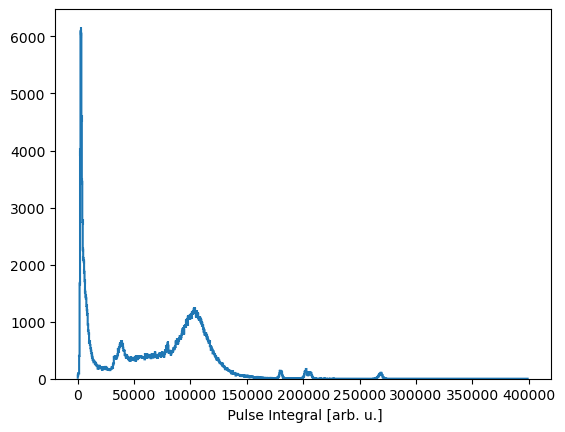

In [23]:
h2.project(0).plot()

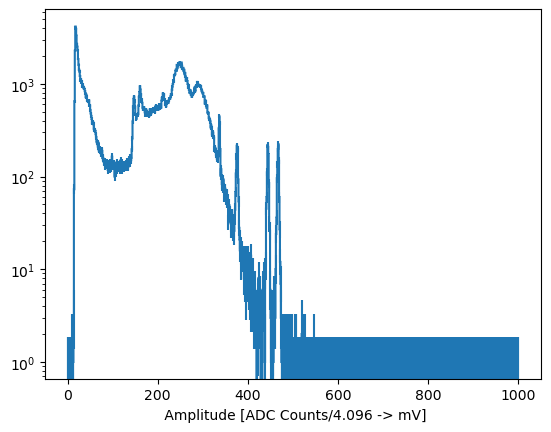

In [24]:
h2.project(1).plot()
plt.yscale("log")

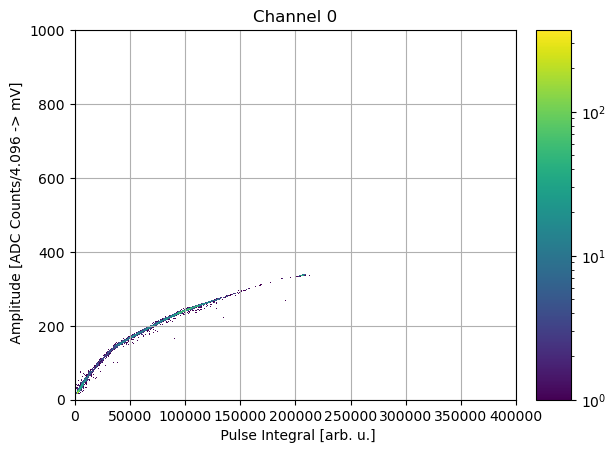

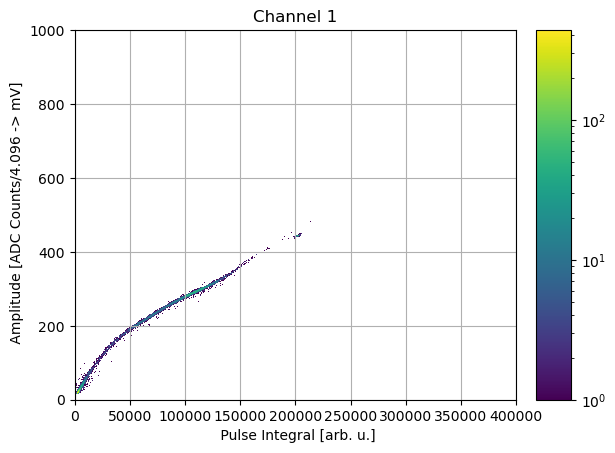

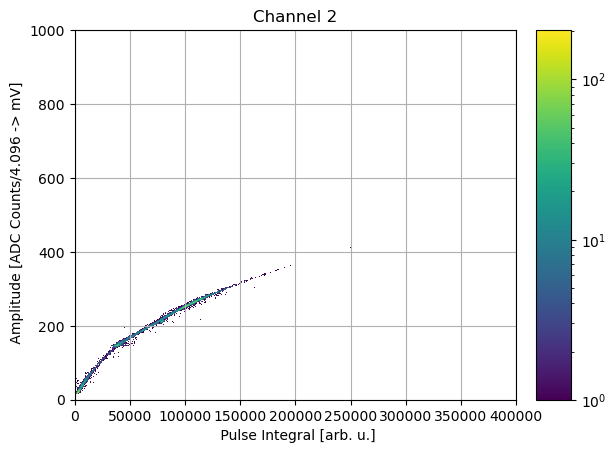

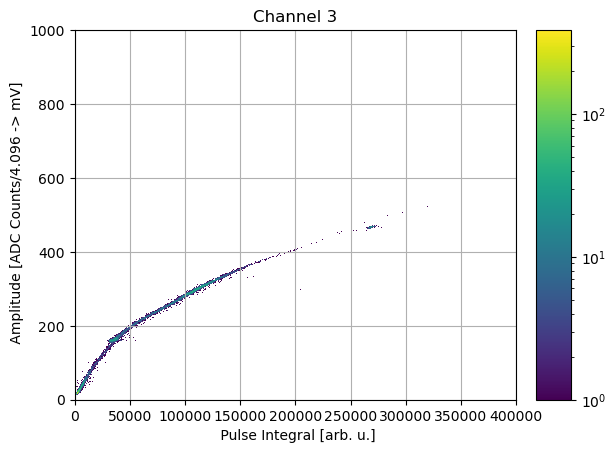

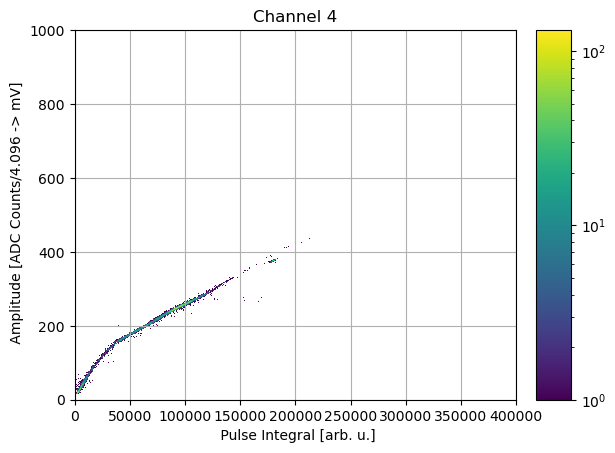

In [26]:
for channel in range(5):
    hi = h2[:,:,hist.loc(channel)]
    hi.plot(
        norm=matplotlib.colors.LogNorm(vmin=1)
    )
    plt.grid()
    plt.title(f"Channel {channel}")
    plt.show()

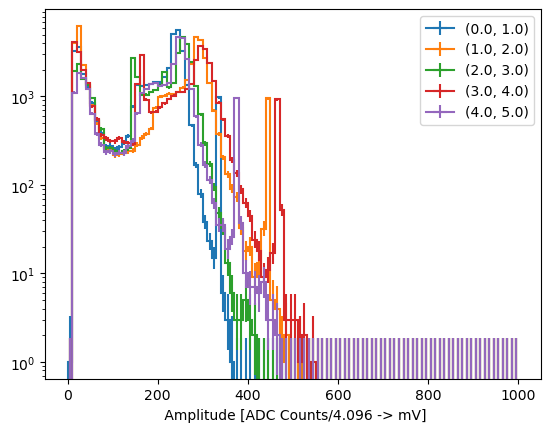

In [27]:
h2[::sum,::hist.rebin(10),:].stack(1).plot()
plt.legend()
plt.yscale("log")
plt.show()

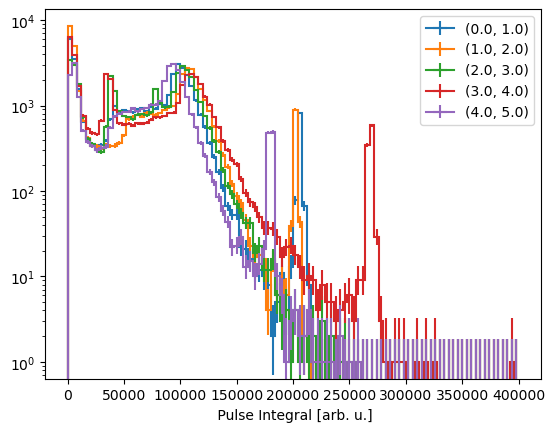

In [28]:
h2[::hist.rebin(10),::sum,:].stack(1).plot()
plt.legend()
plt.yscale("log")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


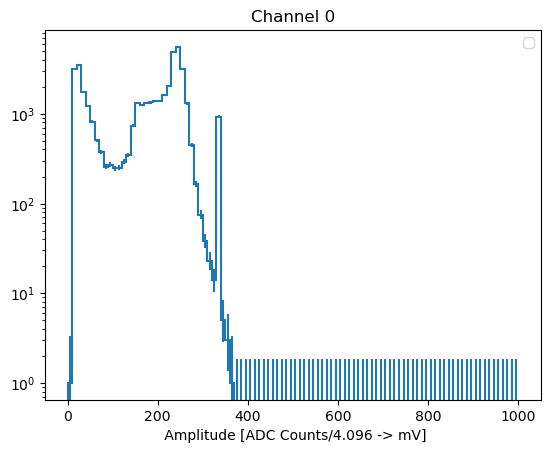

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


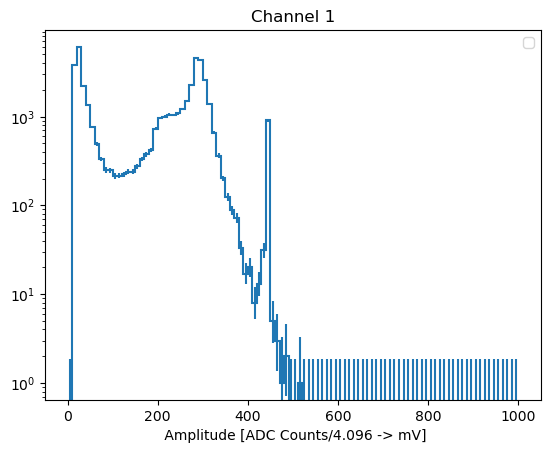

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


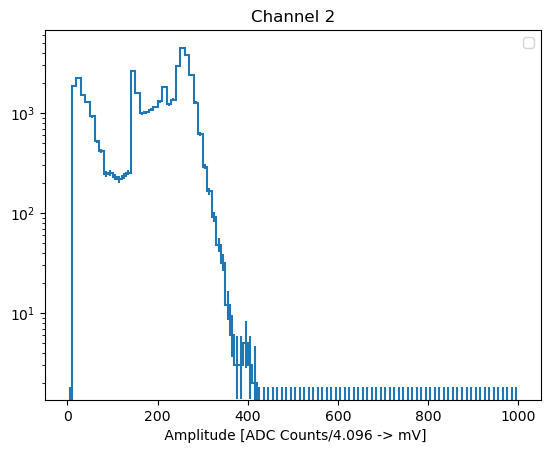

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


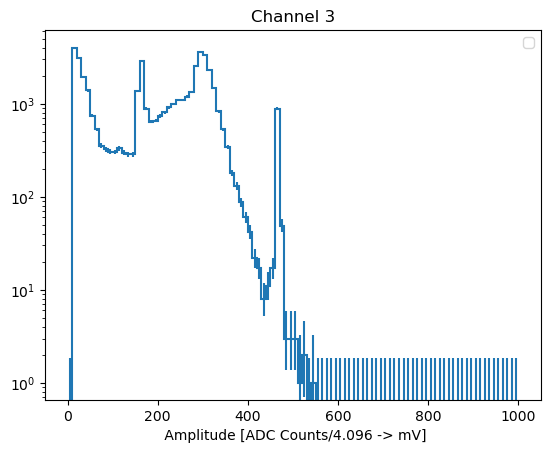

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


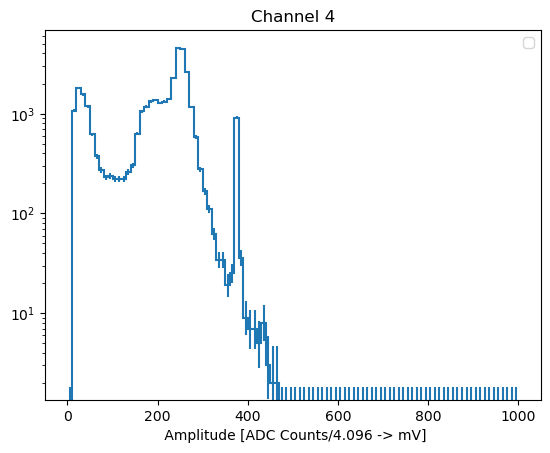

In [15]:
for channel in range(5):
    h2[::sum,::hist.rebin(10),hist.loc(channel)].plot()
    plt.legend()
    plt.yscale("log")
    plt.title(f'Channel {channel}')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


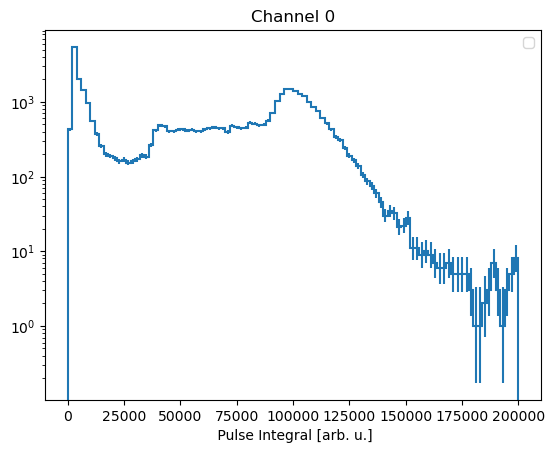

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


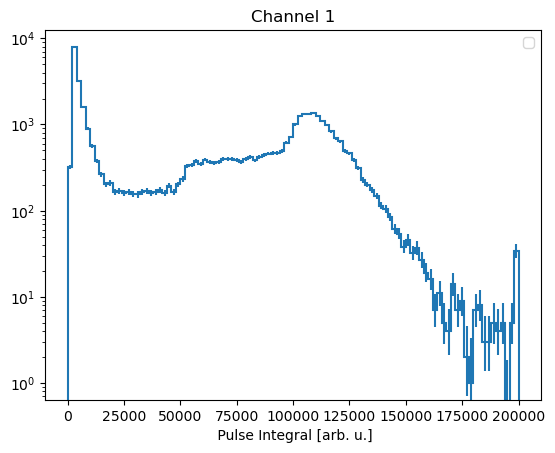

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


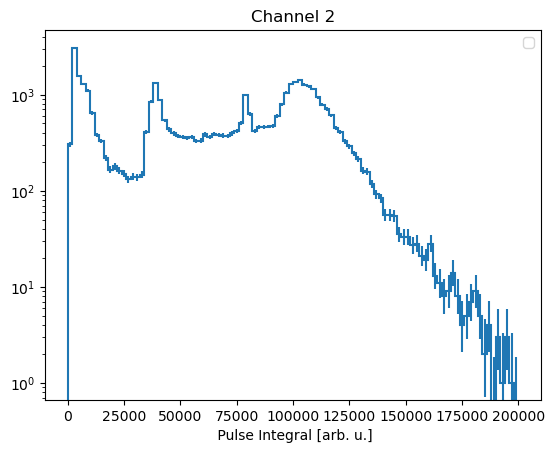

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


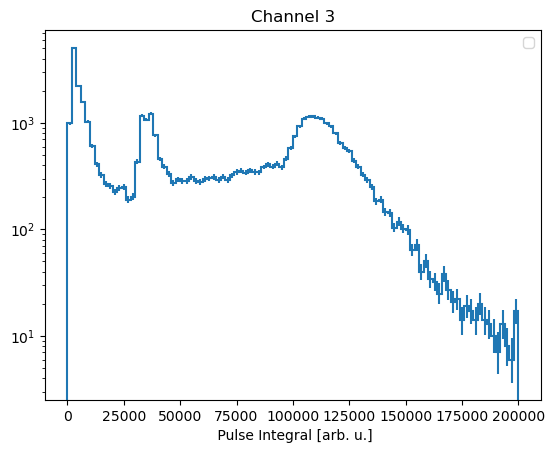

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


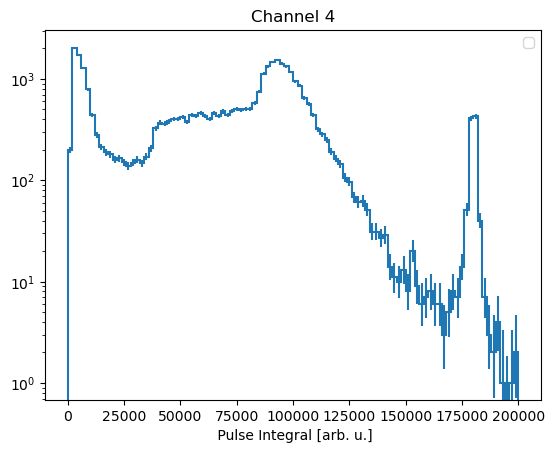

In [16]:
for channel in range(5):
    h2[::hist.rebin(10),::sum,hist.loc(channel)].plot()
    plt.legend()
    plt.yscale("log")
    plt.title(f'Channel {channel}')
    plt.show()

In [17]:
n = t.Draw("Entry$", "integrals.channelTag == 4 && integrals.integral > 175000","goff")
print(n)


1009


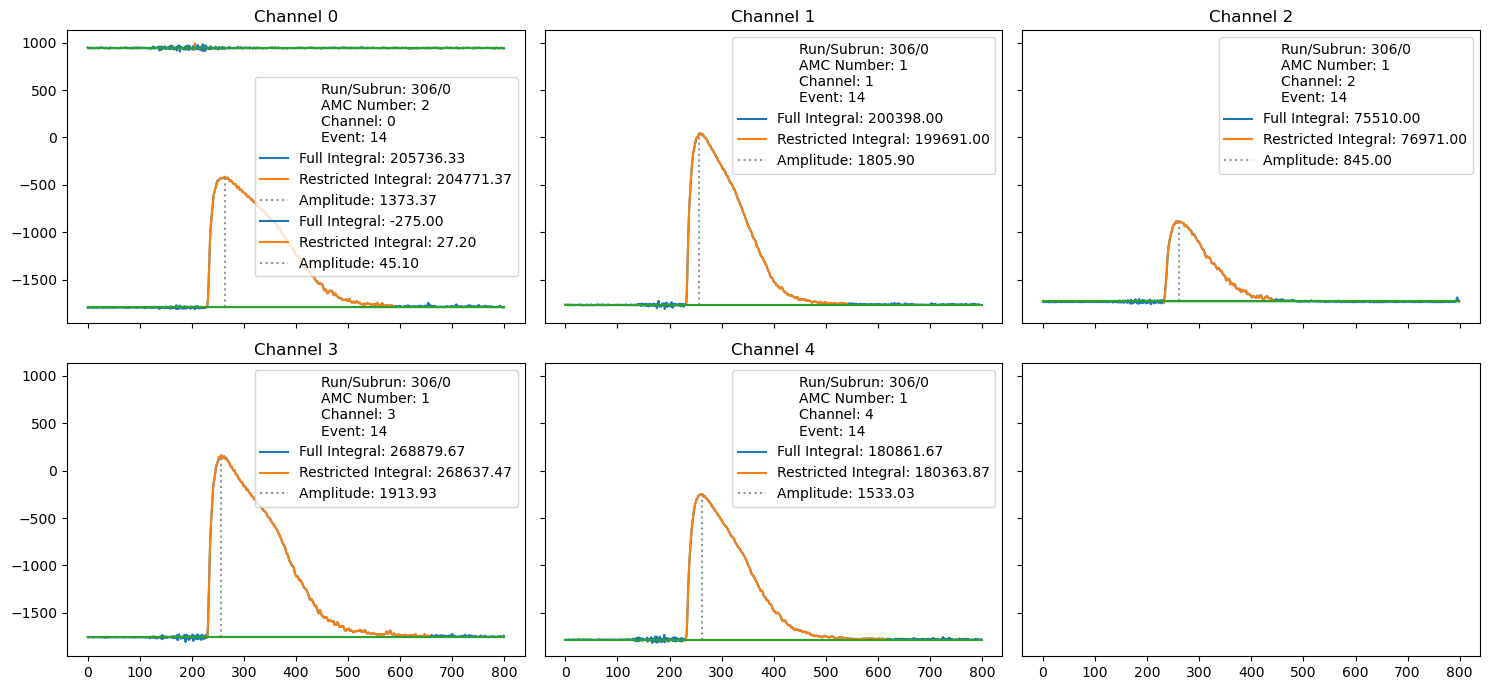

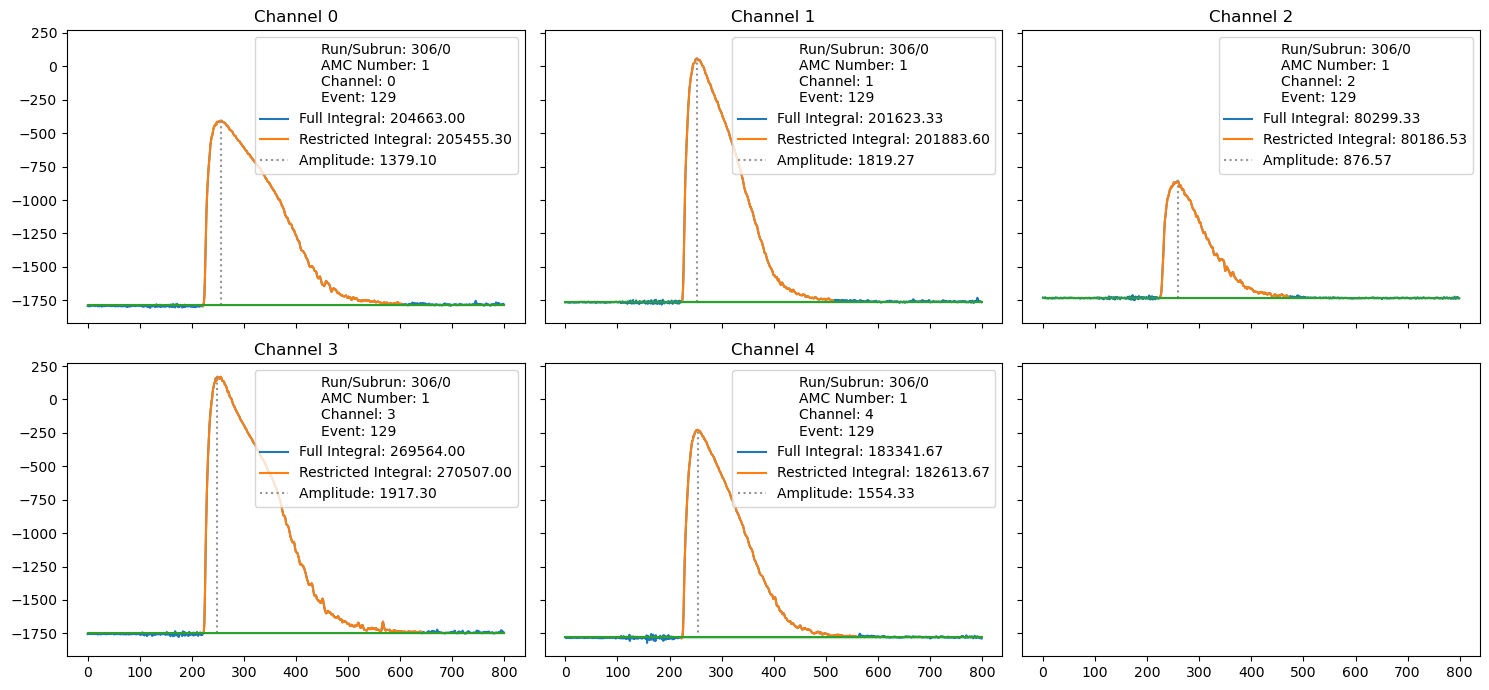

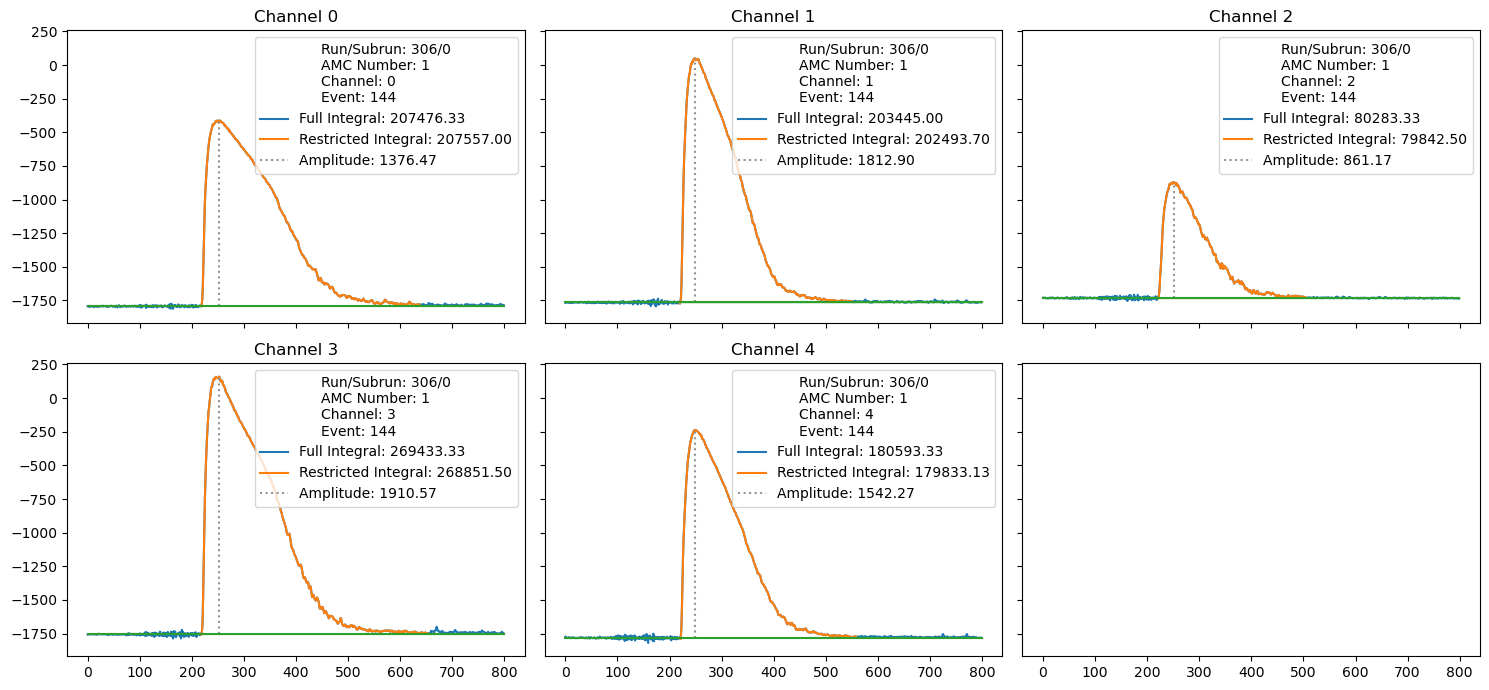

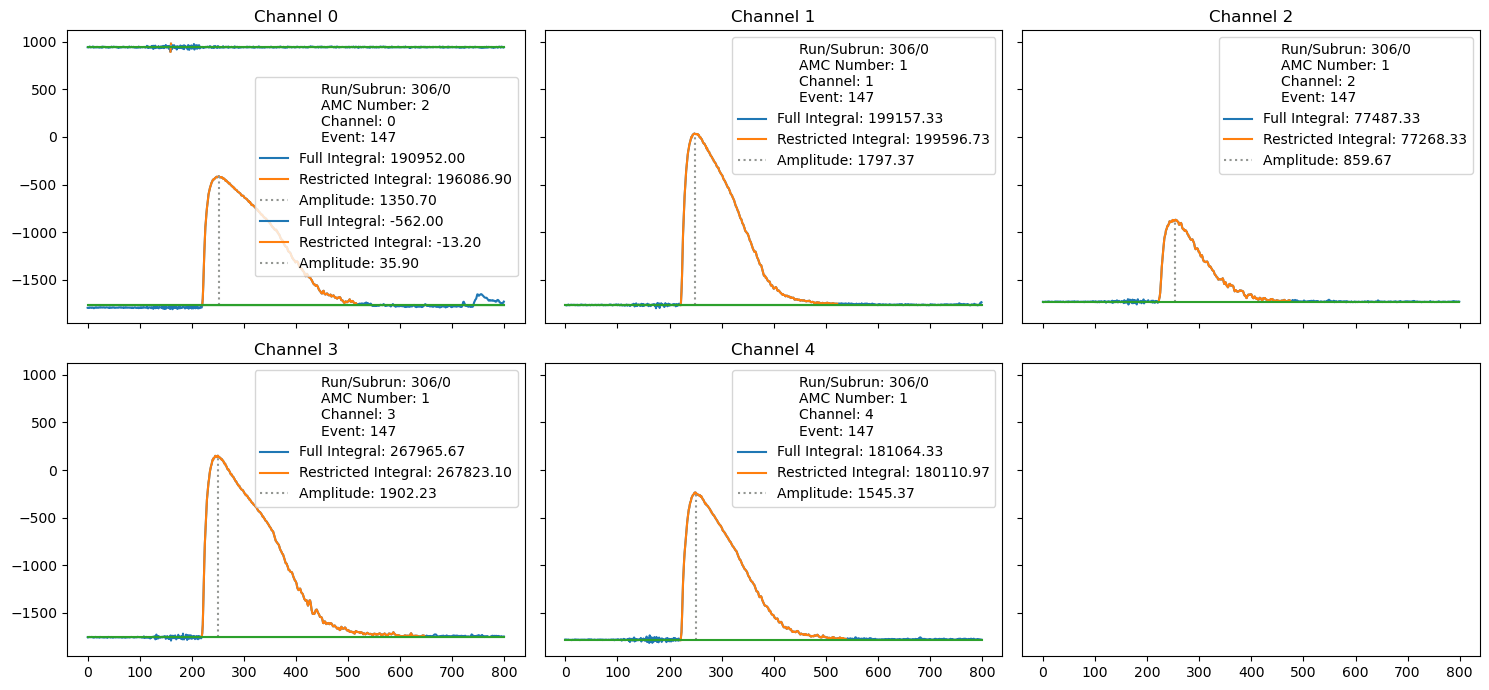

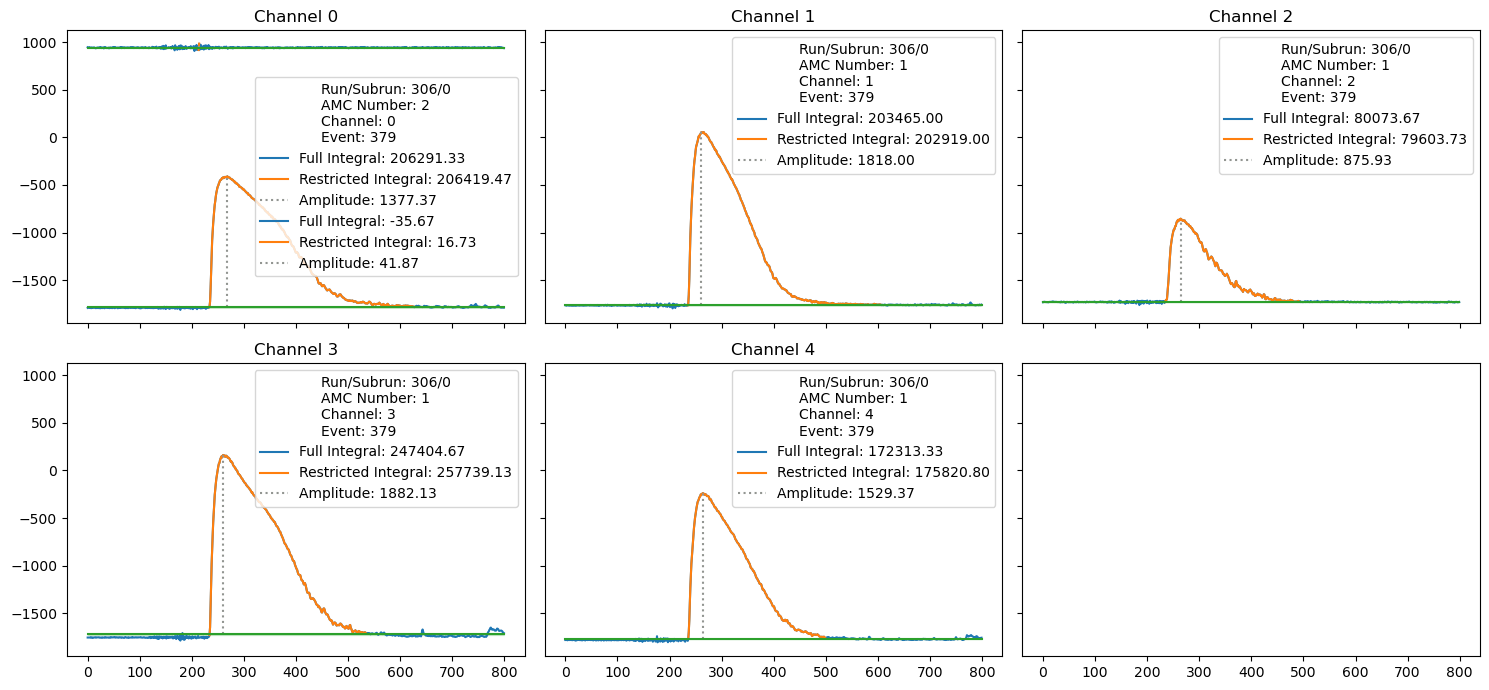

In [20]:
for i in range(5):
    if( i > n):
        break
    entry = int(t.GetV1()[i])
    t.GetEntry(entry)
    fig,ax = plt.subplots(2,3,figsize=(15,7), sharex=True, sharey=True)
    for wfi in t.integrals:
        axi = ax.ravel()[wfi.channelTag]
        axi.set_title(f'Channel {wfi.channelTag}')
        plot_integral(wfi,ax=axi)
    plt.tight_layout()
    plt.show()